1. This question should be answered using the Weekly data set, which is part of the ISLR2 package. This data is similar in nature to the Smarket data from this chapter’s lab, except that it contains 1,089 weekly returns for 21 years, from the beginning of 1990 to the end of 2010.

(a) Produce some numerical and graphical summaries of the Weekly data. Do there appear to be any patterns? (With Weekly data discription)


              Year         Lag1         Lag2         Lag3         Lag4  \
count  1089.000000  1089.000000  1089.000000  1089.000000  1089.000000   
mean   2000.048669     0.150585     0.151079     0.147205     0.145818   
std       6.033182     2.357013     2.357254     2.360502     2.360279   
min    1990.000000   -18.195000   -18.195000   -18.195000   -18.195000   
25%    1995.000000    -1.154000    -1.154000    -1.158000    -1.158000   
50%    2000.000000     0.241000     0.241000     0.241000     0.238000   
75%    2005.000000     1.405000     1.409000     1.409000     1.409000   
max    2010.000000    12.026000    12.026000    12.026000    12.026000   

              Lag5       Volume        Today  
count  1089.000000  1089.000000  1089.000000  
mean      0.139893     1.574618     0.149899  
std       2.361285     1.686636     2.356927  
min     -18.195000     0.087465   -18.195000  
25%      -1.166000     0.332022    -1.154000  
50%       0.234000     1.002680     0.241000  
75% 

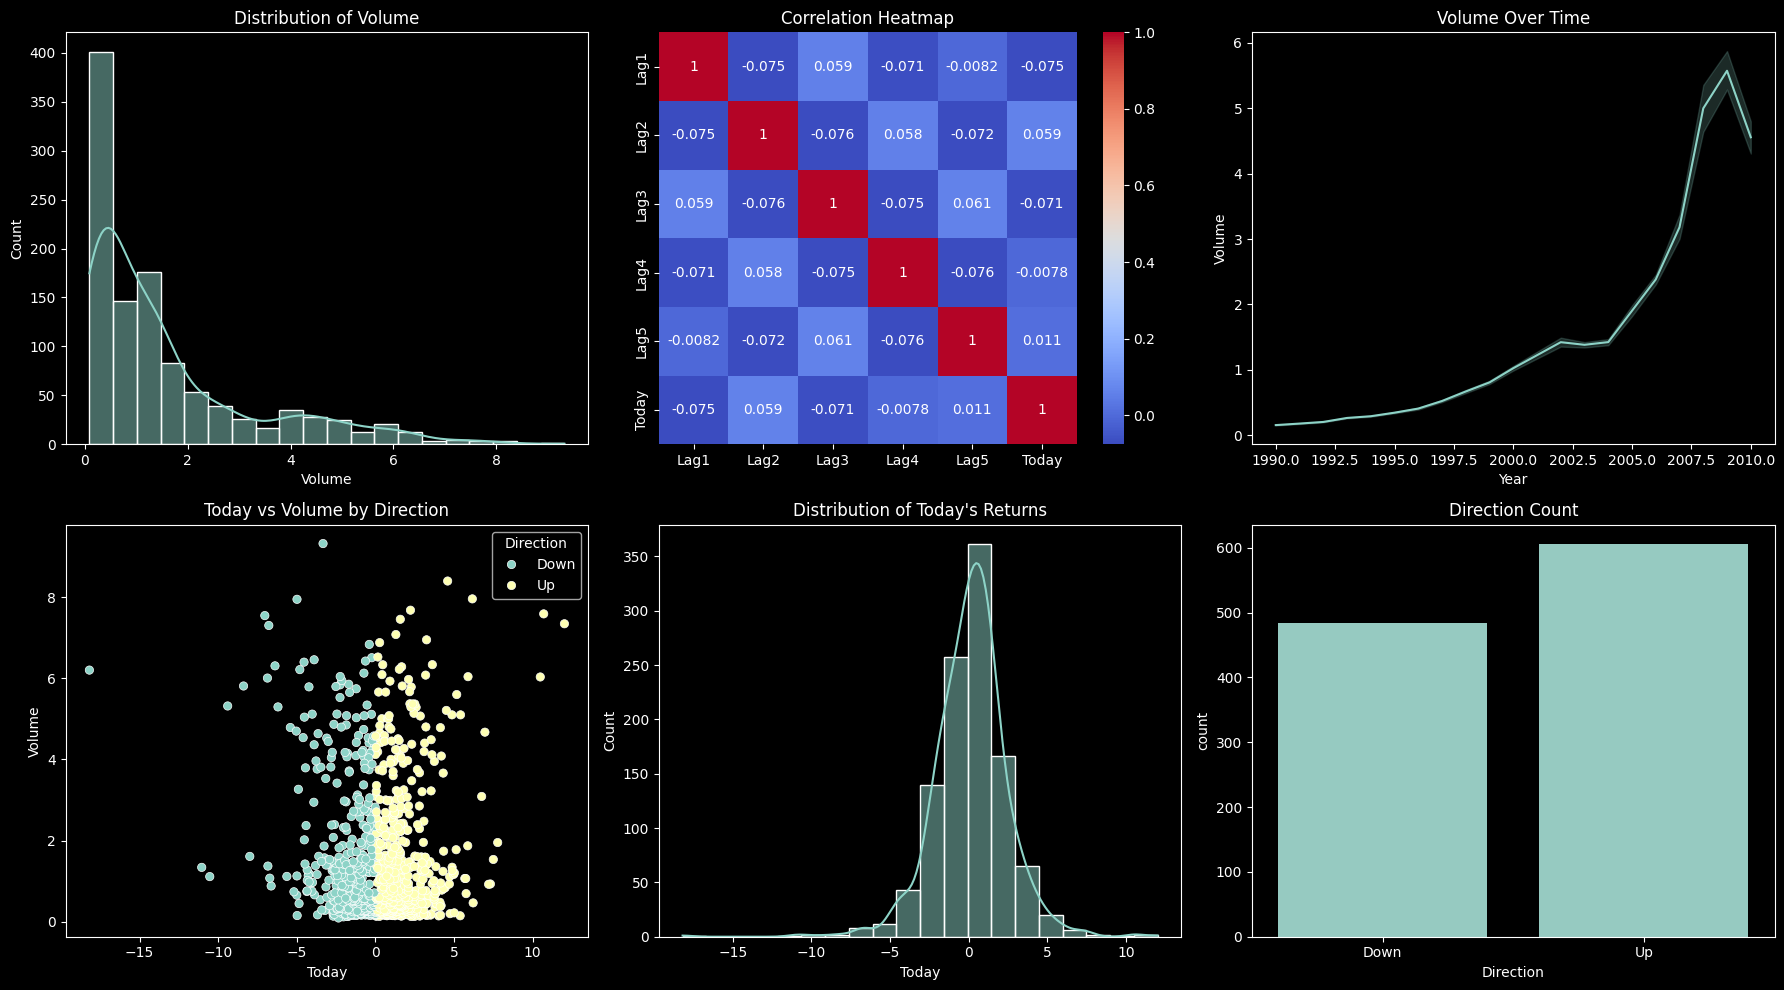

In [1]:
# 필요한 라이브러리 임포트
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드
weekly_data = pd.read_csv('Weekly.csv')

# 데이터 요약
numerical_summary = weekly_data.describe()
print(numerical_summary)

# 그래프 생성
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

# Volume 분포
sns.histplot(weekly_data['Volume'], bins=20, kde=True, ax=axs[0, 0])
axs[0, 0].set_title("Distribution of Volume")

# 상관관계 히트맵
correlation = weekly_data[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Today']].corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm", ax=axs[0, 1])
axs[0, 1].set_title("Correlation Heatmap")

# Volume의 연도별 변화
sns.lineplot(data=weekly_data, x="Year", y="Volume", ax=axs[0, 2])
axs[0, 2].set_title("Volume Over Time")

# Today와 Volume의 산점도 (Direction에 따른 색상)
sns.scatterplot(data=weekly_data, x='Today', y='Volume', hue='Direction', ax=axs[1, 0])
axs[1, 0].set_title("Today vs Volume by Direction")

# Today 분포
sns.histplot(weekly_data['Today'], bins=20, kde=True, ax=axs[1, 1])
axs[1, 1].set_title("Distribution of Today's Returns")

# Direction 카운트
sns.countplot(data=weekly_data, x="Direction", ax=axs[1, 2])
axs[1, 2].set_title("Direction Count")

plt.tight_layout()
plt.show()


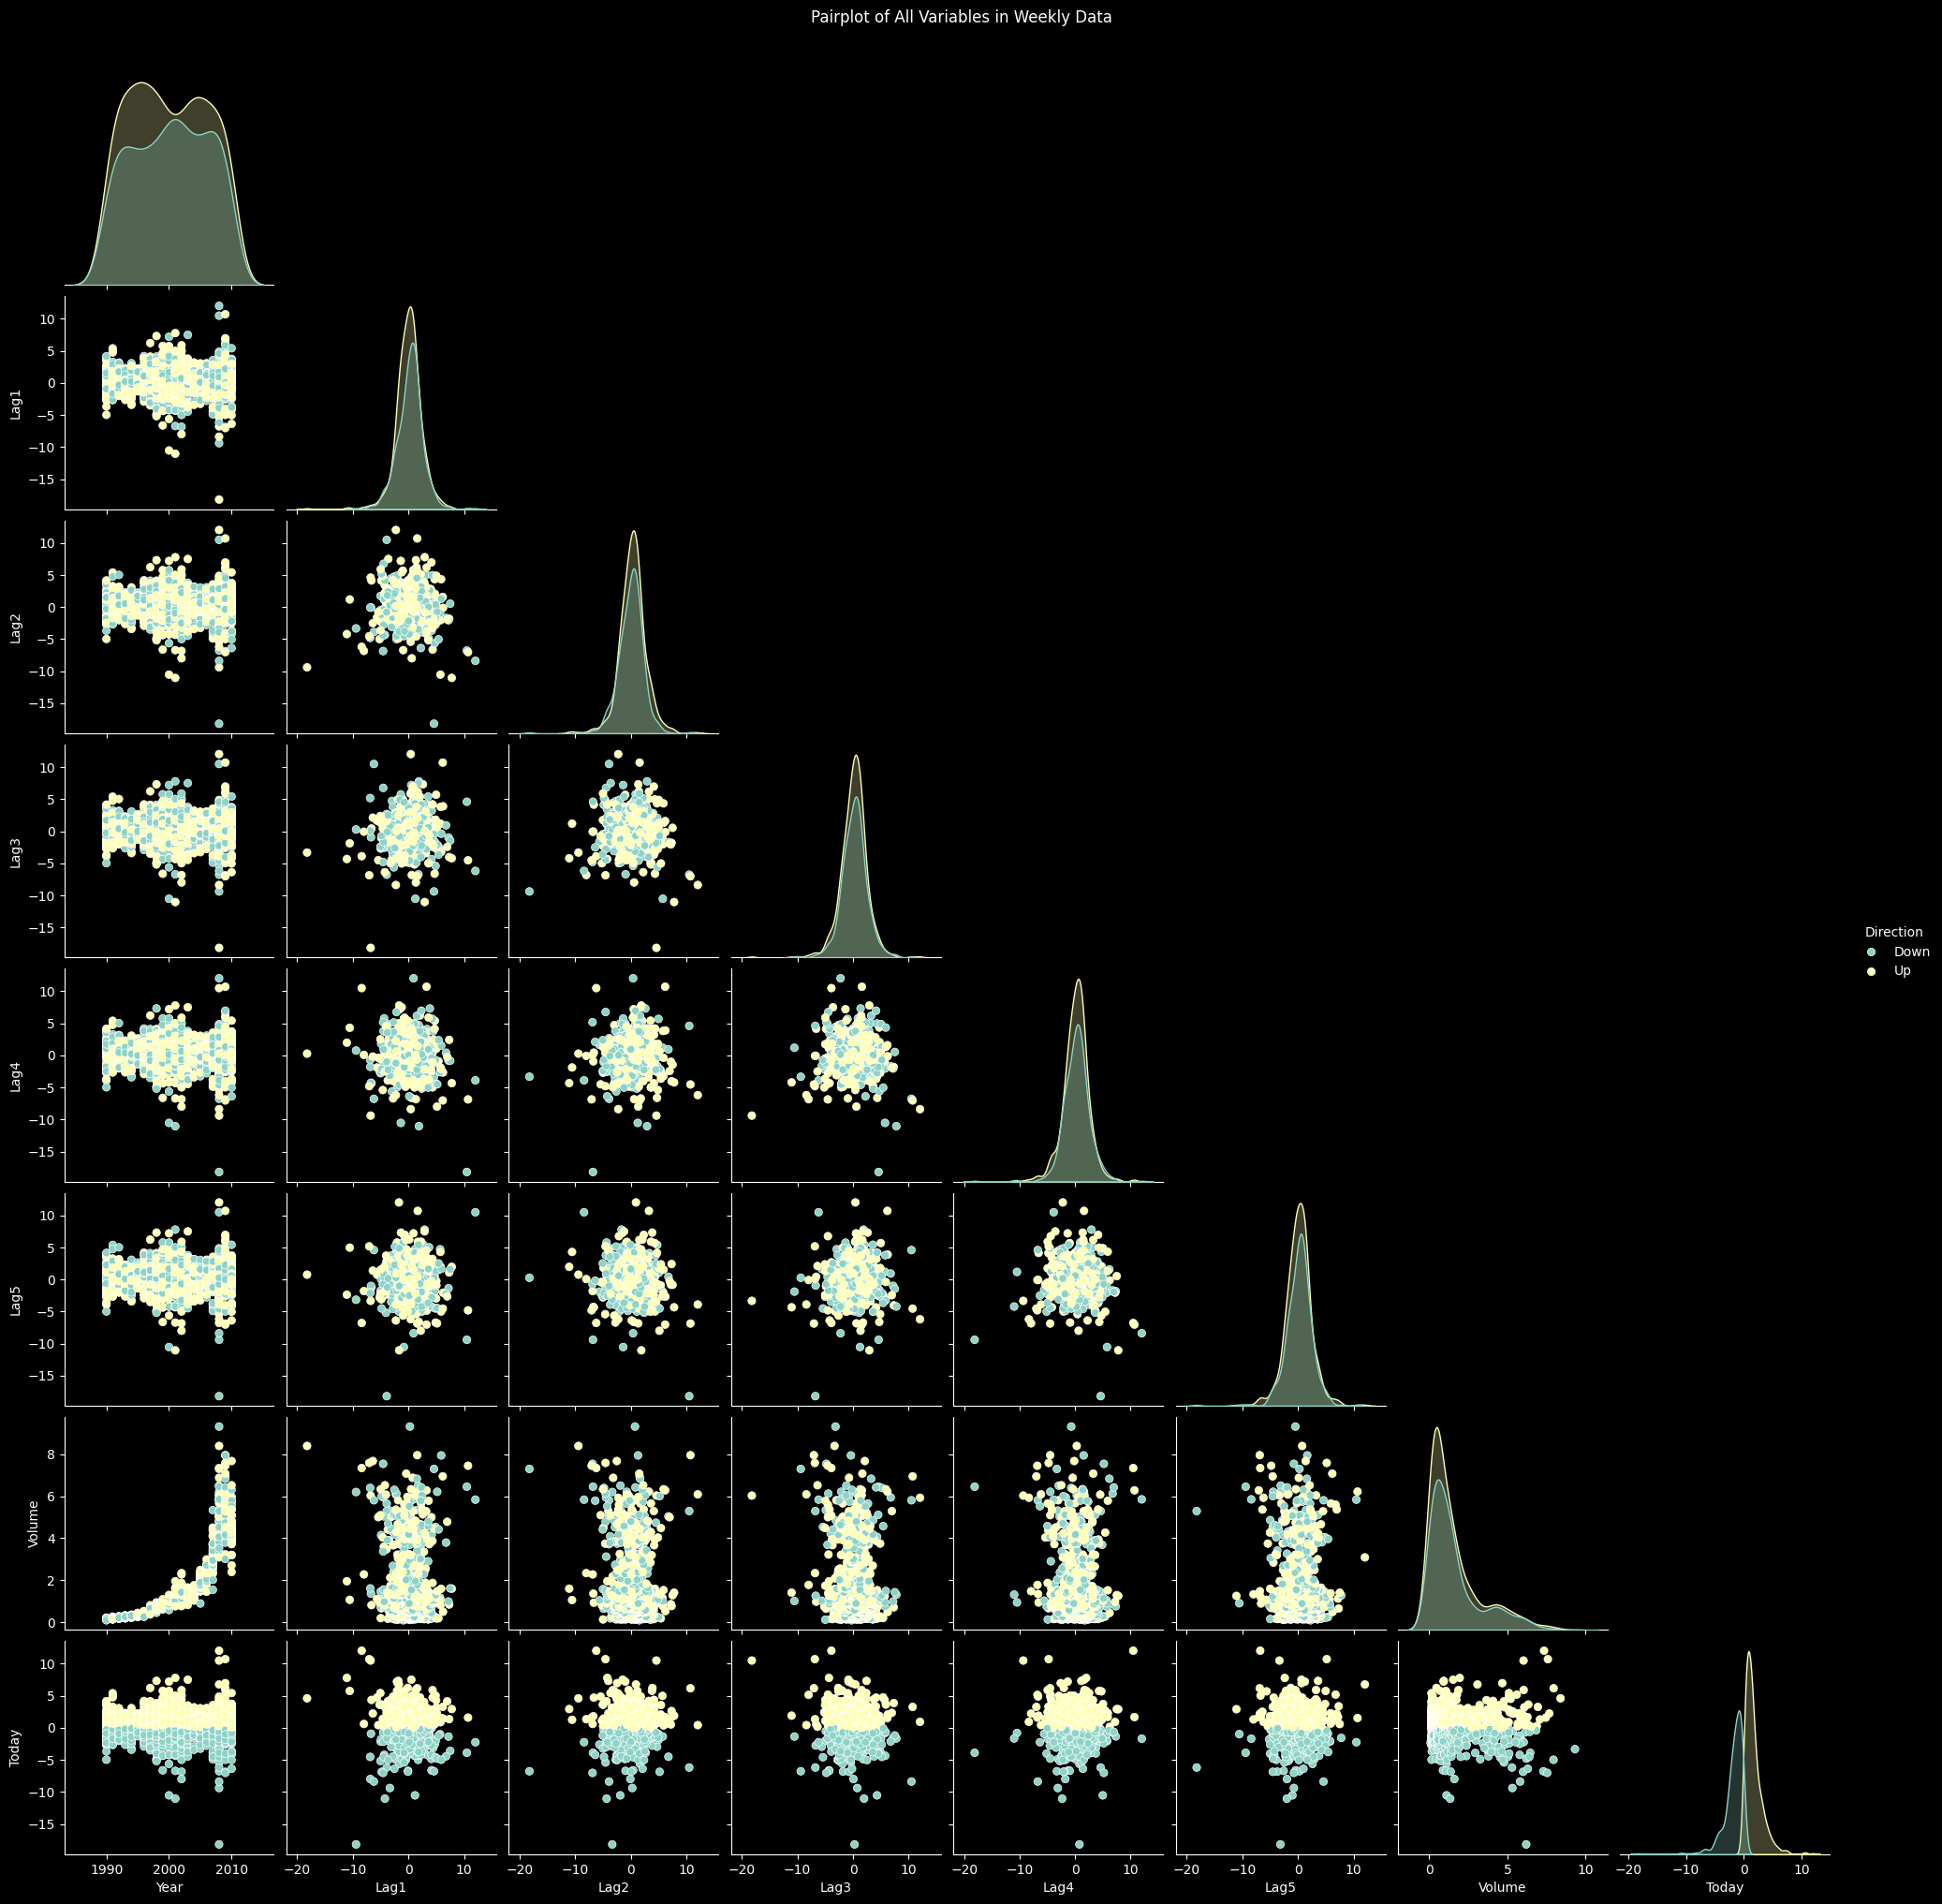

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 로드
weekly_data = pd.read_csv('Weekly.csv')

# pairplot 생성
sns.pairplot(weekly_data, hue='Direction', corner=True)
plt.suptitle("Pairplot of All Variables in Weekly Data", y=1.02)
plt.show()


(b) Use the full data set to perform a logistic regression with Direction as the response and the five lag variables plus Volume as predictors. Use the summary function to print the results. Do any of the predictors appear to be statistically significant? If so, which ones?

In [5]:
!pip install statsmodels

   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/9.9 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.9 MB 4.1 MB/s eta 0:00:03
   -- ------------------------------------- 0.7/9.9 MB 5.5 MB/s eta 0:00:02
   --- ------------------------------------ 0.8/9.9 MB 5.3 MB/s eta 0:00:02
   ---- ----------------------------------- 1.1/9.9 MB 5.0 MB/s eta 0:00:02
   ---- ----------------------------------- 1.2/9.9 MB 4.4 MB/s eta 0:00:02
   ----- ---------------------------------- 1.2/9.9 MB 4.2 MB/s eta 0:00:03
   ----- ---------------------------------- 1.4/9.9 MB 3.8 MB/s eta 0:00:03
   ------ --------------------------------- 1.5/9.9 MB 3.8 MB/s eta 0:00:03
   ------ --------------------------------- 1.5/9.9 MB 3.7 MB/s eta 0:00:03
   ------ --------------------------------- 1.6/9.9 MB 3.3 MB/s eta 0:00:03
   ------ --------------------------------- 1.7/9.9 MB 3.2 MB/s eta 0:00:03
   ------- ---------------


[notice] A new release of pip is available: 24.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder

# 데이터 로드
weekly_data = pd.read_csv('Weekly.csv')

# 'Direction' 변수를 숫자형으로 변환 (Up = 1, Down = 0)
label_encoder = LabelEncoder()
weekly_data['Direction'] = label_encoder.fit_transform(weekly_data['Direction'])

# 예측 변수와 반응 변수 정의
X = weekly_data[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']]
y = weekly_data['Direction']

# 상수항 추가
X = sm.add_constant(X)

# 로지스틱 회귀 모델 적합
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# 결과 요약 출력
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Sat, 02 Nov 2024   Pseudo R-squ.:                0.006580
Time:                        20:49:02   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.1313
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.

(c) Compute the confusion matrix and overall fraction of correct predictions. Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression.

In [7]:
from sklearn.metrics import confusion_matrix, accuracy_score

# 예측 확률 계산
predicted_prob = result.predict(X)
# 확률을 기준으로 0.5를 경계로 하여 Up(1) 또는 Down(0) 예측
predicted_class = (predicted_prob >= 0.5).astype(int)

# 혼동 행렬 계산
conf_matrix = confusion_matrix(y, predicted_class)
accuracy = accuracy_score(y, predicted_class)

# 결과 출력
print("Confusion Matrix:")
print(conf_matrix)
print(f"Overall Accuracy: {accuracy:.4f}")

Confusion Matrix:
[[ 54 430]
 [ 48 557]]
Overall Accuracy: 0.5611


(d) Now fit the logistic regression model using a training data period from 1990 to 2008, with Lag2 as the only predictor. Compute the confusion matrix and the overall fraction of correct predictions for the held out data (that is, the data from 2009 and 2010).

In [8]:
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

# 데이터 로드 및 전처리
weekly_data = pd.read_csv('Weekly.csv')

# 'Direction' 변수를 숫자형으로 변환 (Up = 1, Down = 0)
label_encoder = LabelEncoder()
weekly_data['Direction'] = label_encoder.fit_transform(weekly_data['Direction'])

# 훈련 데이터 (1990-2008)와 테스트 데이터 (2009-2010) 분리
train_data = weekly_data[weekly_data['Year'] <= 2008]
test_data = weekly_data[weekly_data['Year'] >= 2009]

# 훈련 데이터 예측 변수와 반응 변수 설정 (Lag2만 사용)
X_train = sm.add_constant(train_data[['Lag2']])
y_train = train_data['Direction']

# 테스트 데이터 예측 변수와 반응 변수 설정 (Lag2만 사용)
X_test = sm.add_constant(test_data[['Lag2']])
y_test = test_data['Direction']

# 로지스틱 회귀 모델 훈련
logit_model = sm.Logit(y_train, X_train)
result = logit_model.fit()

# 테스트 데이터에 대한 예측 수행
predicted_prob = result.predict(X_test)
predicted_class = (predicted_prob >= 0.5).astype(int)

# 혼동 행렬과 정확도 계산
conf_matrix = confusion_matrix(y_test, predicted_class)
accuracy = accuracy_score(y_test, predicted_class)

# 결과 출력
print("Confusion Matrix:")
print(conf_matrix)
print(f"Overall Accuracy: {accuracy:.4f}")


Optimization terminated successfully.
         Current function value: 0.685555
         Iterations 4
Confusion Matrix:
[[ 9 34]
 [ 5 56]]
Overall Accuracy: 0.6250


(e) Repeat (d) using LDA.

In [9]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

# 데이터 로드 및 전처리
weekly_data = pd.read_csv('Weekly.csv')

# 'Direction' 변수를 숫자형으로 변환 (Up = 1, Down = 0)
label_encoder = LabelEncoder()
weekly_data['Direction'] = label_encoder.fit_transform(weekly_data['Direction'])

# 훈련 데이터 (1990-2008)와 테스트 데이터 (2009-2010) 분리
train_data = weekly_data[weekly_data['Year'] <= 2008]
test_data = weekly_data[weekly_data['Year'] >= 2009]

# 훈련 및 테스트 데이터에서 예측 변수와 반응 변수 설정 (Lag2만 사용)
X_train = train_data[['Lag2']]
y_train = train_data['Direction']
X_test = test_data[['Lag2']]
y_test = test_data['Direction']

# LDA 모델 훈련
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# 테스트 데이터에 대한 예측 수행
predicted_class = lda.predict(X_test)

# 혼동 행렬과 정확도 계산
conf_matrix = confusion_matrix(y_test, predicted_class)
accuracy = accuracy_score(y_test, predicted_class)

# 결과 출력
print("Confusion Matrix:")
print(conf_matrix)
print(f"Overall Accuracy: {accuracy:.4f}")


Confusion Matrix:
[[ 9 34]
 [ 5 56]]
Overall Accuracy: 0.6250


(e) Repeat (d) using QDA.

In [10]:
import pandas as pd
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

# 데이터 로드 및 전처리
weekly_data = pd.read_csv('Weekly.csv')

# 'Direction' 변수를 숫자형으로 변환 (Up = 1, Down = 0)
label_encoder = LabelEncoder()
weekly_data['Direction'] = label_encoder.fit_transform(weekly_data['Direction'])

# 훈련 데이터 (1990-2008)와 테스트 데이터 (2009-2010) 분리
train_data = weekly_data[weekly_data['Year'] <= 2008]
test_data = weekly_data[weekly_data['Year'] >= 2009]

# 훈련 및 테스트 데이터에서 예측 변수와 반응 변수 설정 (Lag2만 사용)
X_train = train_data[['Lag2']]
y_train = train_data['Direction']
X_test = test_data[['Lag2']]
y_test = test_data['Direction']

# QDA 모델 훈련
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

# 테스트 데이터에 대한 예측 수행
predicted_class = qda.predict(X_test)

# 혼동 행렬과 정확도 계산
conf_matrix = confusion_matrix(y_test, predicted_class)
accuracy = accuracy_score(y_test, predicted_class)

# 결과 출력
print("Confusion Matrix:")
print(conf_matrix)
print(f"Overall Accuracy: {accuracy:.4f}")


Confusion Matrix:
[[ 0 43]
 [ 0 61]]
Overall Accuracy: 0.5865


(j) Experiment with different combinations of predictors, including possible transformations and interactions, for each of the methods. Report the variables, method, and associated confusion matrix that appears to provide the best results on the held out data.

In [13]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from itertools import combinations

# 데이터 로드 및 전처리
weekly_data = pd.read_csv('Weekly.csv')

# 'Direction' 변수를 숫자형으로 변환 (Up = 1, Down = 0)
weekly_data['Direction'] = weekly_data['Direction'].apply(lambda x: 1 if x == 'Up' else 0)

# 훈련 데이터 (1990-2008)와 테스트 데이터 (2009-2010) 분리
train_data = weekly_data[weekly_data['Year'] <= 2008]
test_data = weekly_data[weekly_data['Year'] >= 2009]

# 함수: 모델을 평가하고 결과 반환
def evaluate_model(X_train, y_train, X_test, y_test, model):
    model.fit(X_train, y_train)
    predicted_class = model.predict(X_test)
    conf_matrix = confusion_matrix(y_test, predicted_class)
    accuracy = accuracy_score(y_test, predicted_class)
    return conf_matrix, accuracy

# 변수 목록과 초기 설정
predictors = ['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']
all_results = []
best_result = {"accuracy": 0}

# 모든 조합을 통해 모델을 평가
for i in range(1, len(predictors) + 1):
    for combo in combinations(predictors, i):
        # 원본 변수 조합
        X_train = train_data[list(combo)]
        X_test = test_data[list(combo)]
        y_train = train_data['Direction']
        y_test = test_data['Direction']
        
        # 상호작용 추가 (2차 상호작용)
        poly = PolynomialFeatures(interaction_only=True, include_bias=False)
        X_train_inter = poly.fit_transform(X_train)
        X_test_inter = poly.transform(X_test)
        
        # 모델 정의
        models = {
            "Logistic Regression": LogisticRegression(max_iter=200, solver='liblinear'),
            "LDA": LinearDiscriminantAnalysis(),
            "QDA": QuadraticDiscriminantAnalysis()
        }
        
        for method_name, model in models.items():
            # 원본 변수 조합 평가
            conf_matrix, accuracy = evaluate_model(X_train, y_train, X_test, y_test, model)
            all_results.append({
                "model": method_name,
                "variables": list(combo),
                "confusion_matrix": conf_matrix,
                "accuracy": accuracy
            })
            # 최고 성능 업데이트
            if accuracy > best_result["accuracy"]:
                best_result = {
                    "model": method_name,
                    "variables": list(combo),
                    "confusion_matrix": conf_matrix,
                    "accuracy": accuracy
                }
            
            # 상호작용 포함 조합 평가
            conf_matrix_inter, accuracy_inter = evaluate_model(X_train_inter, y_train, X_test_inter, y_test, model)
            all_results.append({
                "model": method_name,
                "variables": list(combo) + ["interaction"],
                "confusion_matrix": conf_matrix_inter,
                "accuracy": accuracy_inter
            })
            # 최고 성능 업데이트
            if accuracy_inter > best_result["accuracy"]:
                best_result = {
                    "model": method_name,
                    "variables": list(combo) + ["interaction"],
                    "confusion_matrix": conf_matrix_inter,
                    "accuracy": accuracy_inter
                }

# 결과를 DataFrame으로 정리하고 정확도를 기준으로 정렬
results_df = pd.DataFrame(all_results)
results_df_sorted = results_df.sort_values(by="accuracy", ascending=False).reset_index(drop=True)

# 정렬된 결과 출력
print("All Model Results:")
print(results_df_sorted)

# 최고 성능 결과 출력
print("\nBest Model Result:")
print(f"Model: {best_result['model']}")
print(f"Variables: {best_result['variables']}")
print("Confusion Matrix:")
print(best_result["confusion_matrix"])
print(f"Overall Accuracy: {best_result['accuracy']:.4f}")


All Model Results:
                   model                                      variables  \
0    Logistic Regression                [Lag2, Lag3, Lag4, interaction]   
1                    LDA                [Lag2, Lag3, Lag4, interaction]   
2                    QDA    [Lag1, Lag2, Lag3, Lag4, Lag5, interaction]   
3                    LDA                                   [Lag2, Lag4]   
4                    LDA                      [Lag2, Lag3, interaction]   
..                   ...                                            ...   
373                  QDA              [Lag1, Lag5, Volume, interaction]   
374                  QDA              [Lag1, Lag2, Volume, interaction]   
375                  QDA  [Lag1, Lag3, Lag4, Lag5, Volume, interaction]   
376                  QDA                    [Lag1, Volume, interaction]   
377                  QDA        [Lag1, Lag4, Lag5, Volume, interaction]   

         confusion_matrix  accuracy  
0     [[10, 33], [3, 58]]  0.653846  
1   